# En este codigo se reproducira el codigo de "Proyecto: Sistema de Lorenz"

In [20]:
#Importamos 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

### Pequeña historia
Entre los **sistemas caóticos** conocidos resalta la atmósfera terrestre, la cual Lorenz como meteorólogo estudiaba.

Trabajando en un sistema de 12 variables, quiso replicar uno de sus cálculos anteriores. Dejó la computadora haciendo el trabajo, fue por un café, y cuando regresó, a pesar de haber partido de los mismos parámetros iniciales, obtuvo un resultado absurdamente distinto. ¿Qué había pasado?

La computadora que Lorenz había usado no estaba averiada, los números que introdujo habían sido redondeados por milésimas. Los cálculos eran correctos, y sin embargo los resultados arrojaban condiciones climáticas totalmente separadas, es así como Lorenz descubre el caos.

Simplificando la ecuación para facilitar su estudio, formuló el siguiente sistema:

\begin{align}
\frac{dx}{dt} &= \sigma(y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{align}

Donde $σ$, $ρ$ y $β$ son constantes físicas atmosféricas.


## Tarea 1

> «*Implemente la función representativa del sistema en lenguaje Python.
Tenga en cuenta que la variable de estado sería un ndArray de 3 dimensiones. Por otra parte, la función recibe los parámetros de entrada
σ , ρ y β*».

Definimos la funcion solve_lorenz, donde implementaremos las ecuaciones que mencionamos al principio, para (x,y,z).

In [21]:
def solve_lorenz(state, t, σ, ρ, β):
  x, y, z = state #Esto se define como un arrego de 3D
  # Ecuaciones del sistema 
  dx = σ * (y - x)
  dy = x * (ρ - z) - y
  dz = (x * y) - (β * z)
  return dx, dy, dz

# Ejemplo resolviendo para ciertas condiciones iniciales
solve_lorenz((3, 5, 8), t=0, σ=13, ρ=2, β=3/5)

(26, -23, 10.2)

# Tarea 2   

> «*Escriba el código correspondiente a la simulación de este sistema para un intervalo de tiempo $t ∈ [0, 100]$ que contenga 3000 valores equidistantes. Además utilice los parámetros $σ = 10$, $ρ = 28$, $β = 8/3$ y el vector de condiciones iniciales $(1, 1, 1)$. Emplee para ello la función
`odeint`*».

Creamos un intervalo de tiempo con np.linspace y definimos un estado de coordenadas iniciales "initial_state"

In [22]:
#Estado inicial 
initial_state = (1., 1., 1.)
σ, ρ, β = 10, 28, 8/3
#Intervalo de tiempo 
t = np.linspace(0, 100, 3000)
#np.linspace crea un arreglo entre 0 y 100 de 3000 elementos 

print('Valores equidistantes de t:', t.size)

Valores equidistantes de t: 3000


La función `odeint`, *ordinary differential equations integration*, como su nombre indica, nos ayudará a resolver el sistema (con la función `solve_lorenz` previamente implementada) para una secuencia de puntos `t` en el tiempo.

In [23]:
#usamos odeint con la funcion que ya definimos u nuestro  estado inicial 
states = odeint(solve_lorenz, initial_state, t, args=(σ, ρ, β))

xs = states[:, 0]
ys = states[:, 1]
zs = states[:, 2]

Ahora ya que obtuvimos un resultados vamos a graficarlo usando "pyplot.figure"

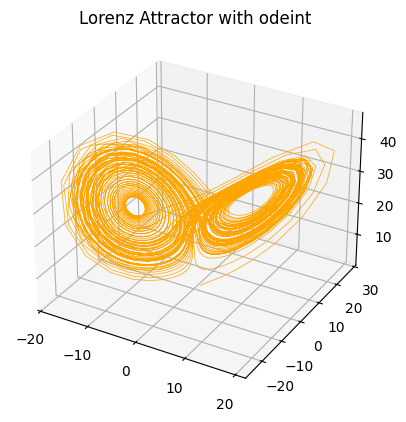

In [24]:
#Grafica 3d
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=0.5, c='orange')
ax.set_title("Lorenz Attractor with odeint")
plt.show()

# Tarea 3

> «*Cree una gráfica en 3 dimensiones que utilice la paleta de colores llamada `plt.cm.plasma` para representar la solución la cual deberá de tener una forma similar a la Figura 1*».

<figure align="center">
<img src="https://raw.githubusercontent.com/leflores-fisi/lorenz-attractor/ef0f459574d3142709b7053c9d3f8e1a28dc9d30/imgs/pec3_figure1.png" align="center" width="300"/>
<figcaption align="center"><i>Figura 1</i></figcaption>
</figure>



In [25]:
cmap = plt.cm.plasma
print("Tipo del objeto colormap:", type(cmap))
# Los colores pueden ser accedidos directamente por indexación
print("Elemento indexado:", cmap(0))

Tipo del objeto colormap: <class 'matplotlib.colors.ListedColormap'>
Elemento indexado: (np.float64(0.050383), np.float64(0.029803), np.float64(0.527975), np.float64(1.0))


Para optimizar el proceso haremos una funcion para realizar toda la tarea 2 dando el "esatdo inicial" y "constantes " 

Trabajaremos de la misma forma, pero en lugar de *plotear* directamente los resultados del `odeint`, los iteraremos para aplicar en intervalos `s` los valores correspondientes de nuestro `colormap`.

C:\Users\dell\AppData\Local\Temp\ipykernel_14032\1000535222.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  lorenz_attractor((1, 1, 1), (10, 28, 8/3)).show()


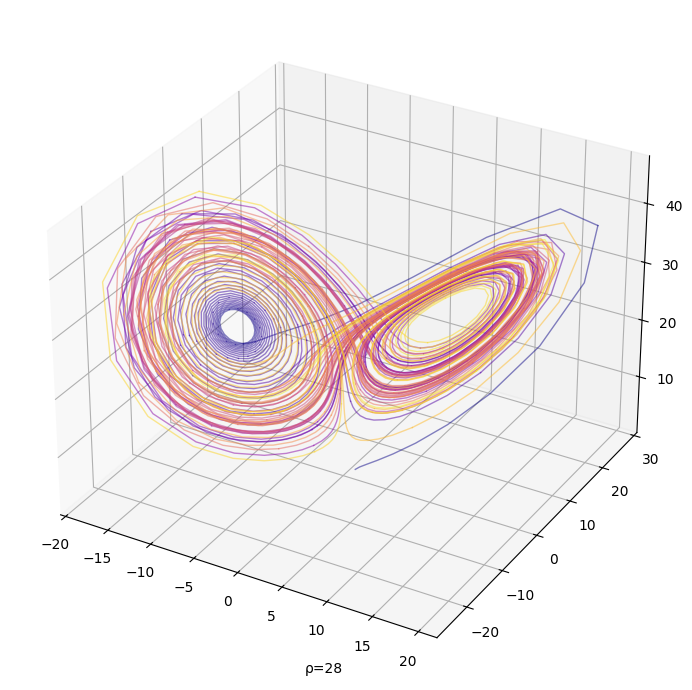

In [26]:
def lorenz_attractor(state0, parameters, ax=None, text_offset=0.01):
  σ, ρ, β = parameters
  n = 3000
  t = np.linspace(0, 100, n)

  # Resolvemos las ecuaciones para la secuencia de puntos t
  states = odeint(solve_lorenz, state0, t, args=(σ, ρ, β))
  xs = states[:, 0]
  ys = states[:, 1]
  zs = states[:, 2]

  if ax is None:
    ax = plt.figure(figsize=(7, 8)).add_subplot(projection='3d')

  # Intervalos de 10 unidades de ancho
  s = 10

  # Iteramos en estos intervalos aplicando el colormap correspondiente
  for i in range(0, n-s ,s):
    ax.plot(xs[i:i+s+1], ys[i:i+s+1], zs[i:i+s+1], color=cmap(i/n), alpha=0.5, lw=1)

  ax.text2D(0.44, text_offset, f"ρ={ρ}", transform=ax.transAxes)
  ax.figure.tight_layout()
  return ax.figure

# Condiciones iniciales propuestas en la Figura 1
lorenz_attractor((1, 1, 1), (10, 28, 8/3)).show()

# Tarea 4

> «*Solucione el mismo problema con los mismos parámetros a excepción de $ρ$ el cual tomará los valores $−42$, $15$, $28$ y $100$. Almacene las respuestas en dos listas, una para el parámetro $ρ$ y la otra para la solución correspondiente.*».

Entonces, almacenamos los 4 valores para la constante $ρ$ en `rho_values` y ejecutamos nuestro `lorenz_attractor` para cada valor de $ρ$, con todo lo demás constante, obteniendo así los resultado esperados.

C:\Users\dell\AppData\Local\Temp\ipykernel_14032\86678729.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  solution.show()


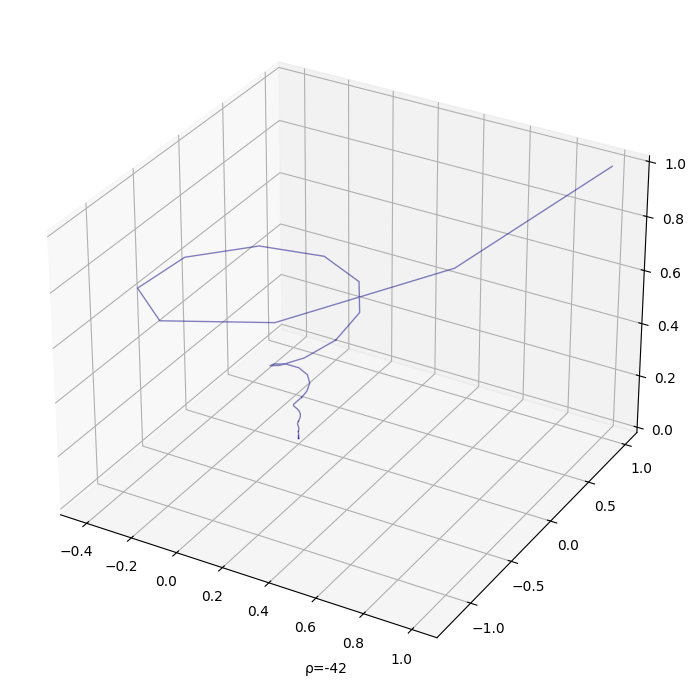

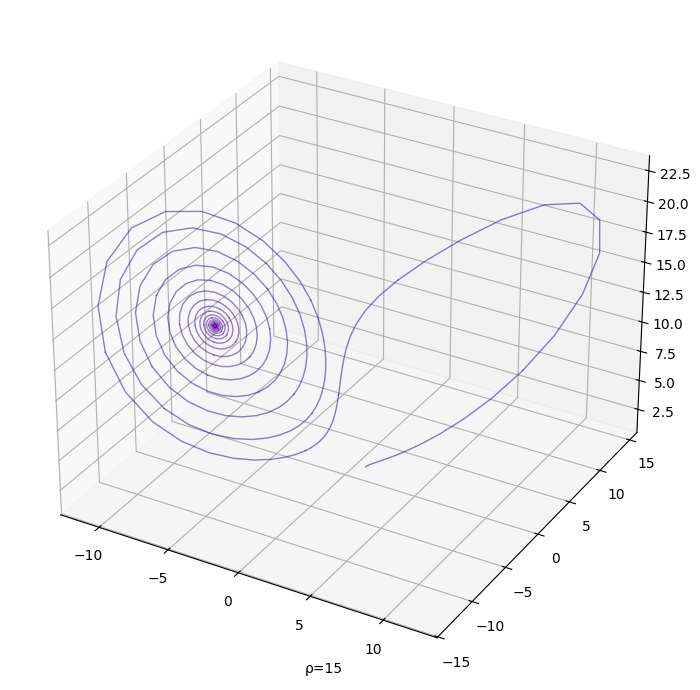

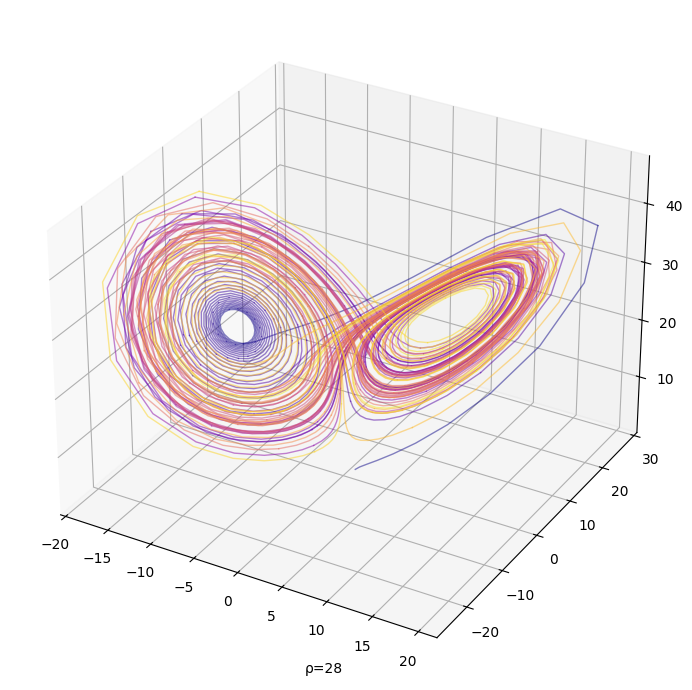

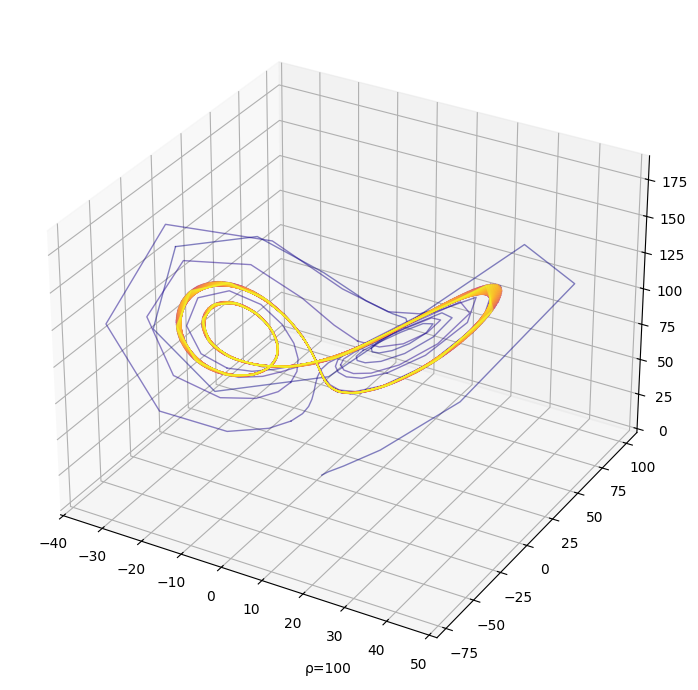

In [27]:
#Definimos los valres de rho
rho_values = [-42, 15, 28, 100]
#Aplicamos
solutions = [lorenz_attractor((1, 1, 1), (10, rho, 8/3)) for rho in rho_values]

for solution in solutions:
  solution.show()

# Tarea 5

> «*Cree gráficas de 3 dimensiones para representar cada solución, todas
en la misma figura. Para ello cree una figura de 2 fila y 2 columnas.
Coloque en el texto del título de la gráfica el parámetro $ρ$ igualado a
el valor correspondiente en cada caso. Garantice que la figura tenga
un tamaño de $10 × 10$*».

Definimos el parámetro para la figura, `size=(10, 10)` con 2 filas y dos columnas, esto es, 4 `subplots` dentro de ella.

In [28]:
rows, cols = 2, 2
size = (10, 10)

Instanciaremos la figura e iteraremos los `axes` bidimensionalmente para cada `axe` de la figura con un valor específico de $ρ$. Esto con ayuda de `numpy.ndindex`, obteniendo el resultado deseado.

C:\Users\dell\AppData\Local\Temp\ipykernel_14032\336415080.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


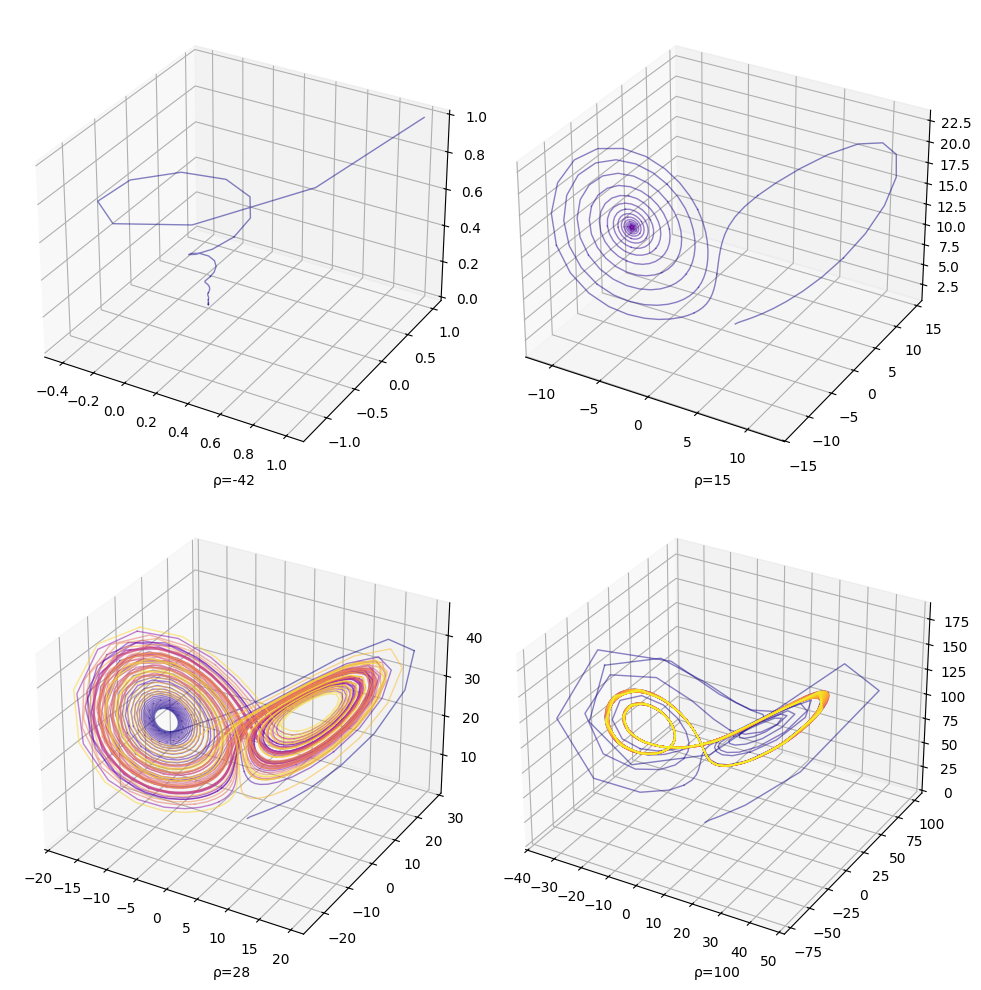

In [29]:
# Instanciamos nuestra figura y sus axes
fig, axs = plt.subplots(rows, cols, figsize=size, subplot_kw = dict(projection='3d'))

# Transformamos el array a uno bidimensional de rows×cols
rho_values2d = np.array(rho_values).reshape(rows, cols)

# Iteramos en (0, 0), (0, 1), (1, 0), (1, 1)
for row, col in np.ndindex((rows, cols)):
  rho = rho_values2d[row ,col]
  # Introducimos el eje correspondiente en nuestra función
  lorenz_attractor((1, 1, 1),
                   (10, rho, 8/3),
                   ax=axs[row, col],
                   text_offset=-0.03)

fig.show()

# FINAL 

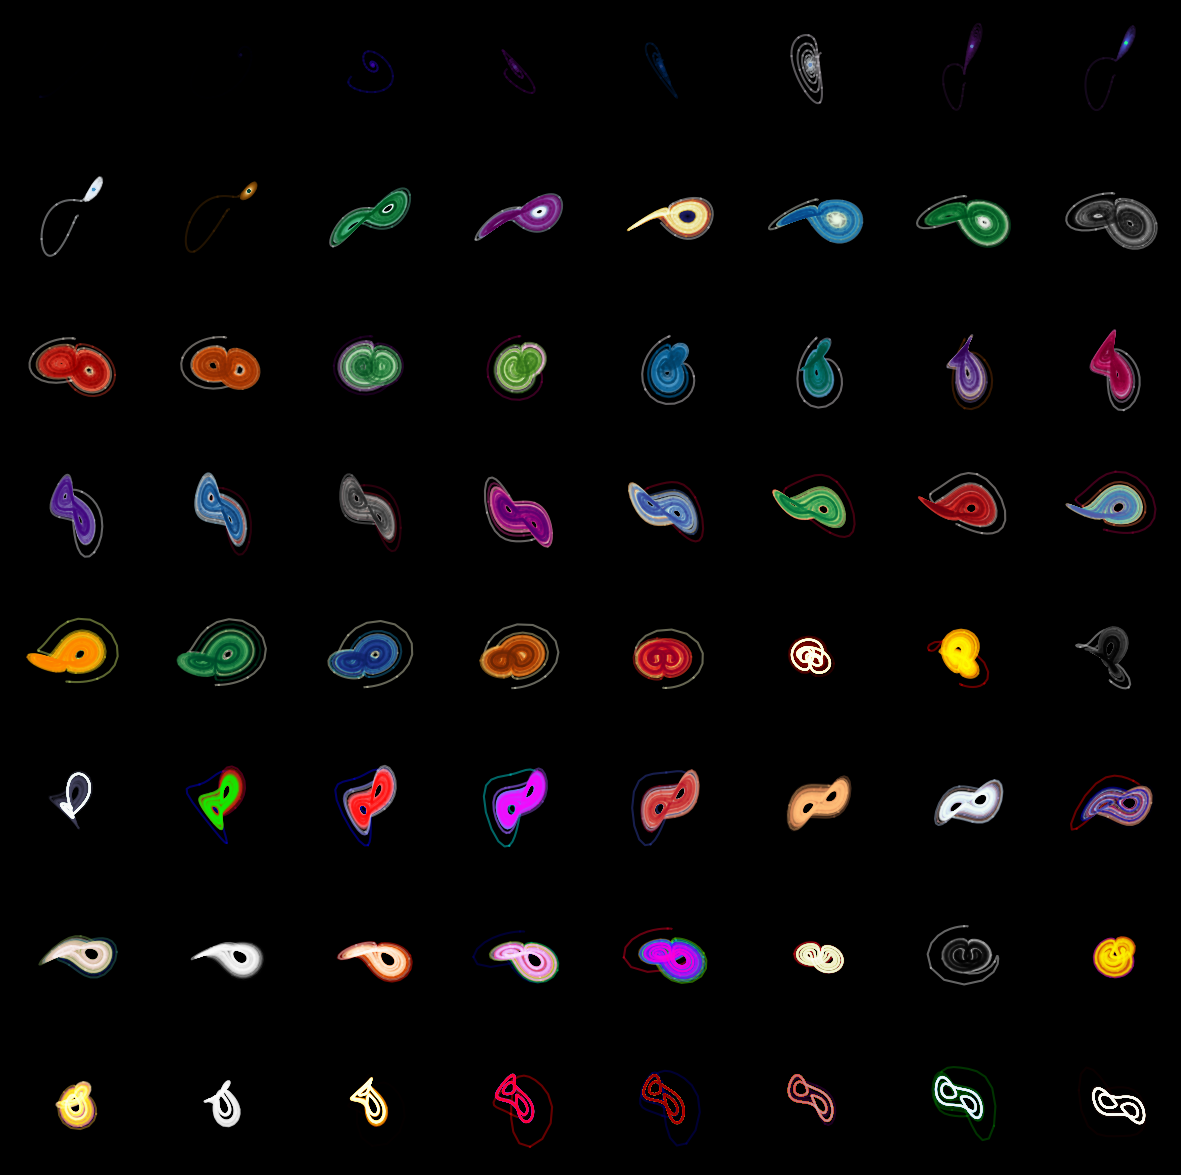

In [30]:
fsize = (15, 15)
ndim = 8

def butterfly(ax, colormap, rho, angle):
  tmax = 100
  n = 10000
  sigma, rho, beta = (10, rho, 2.667)
  u0, v0, w0 = (0, 1, 1.05)
  t = np.linspace(0, tmax, n)

  soln = odeint(solve_lorenz, (u0, v0, w0), t, args=(sigma, rho, beta))
  # Interpolate solution onto the time grid, t.
  x, y, z = soln[:, 0], soln[:, 1], soln[:, 2]

  ax.set_facecolor('k')

  s = 10
  cmap = getattr(plt.cm, colormap)
  for i in range(0,n-s,s):
      ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

  # Remove all the axis clutter, leaving just the curve.
  ax.set_axis_off()
  ax.view_init(angle, angle)

axs = plt.figure(facecolor='k', figsize=fsize).subplots(ndim, ndim, subplot_kw = dict(projection='3d'))

for i, (row, col) in enumerate(np.ndindex((ndim, ndim))):
  butterfly(axs[row, col], plt.colormaps()[i], rho=2.5*i, angle=10*i)